* Car accident has been steadly increasing for the last decade. While performing exploration data analysis,we find that there is a lot of variation among states. Instead of implementing a costly national plan, we want to focus on groups of states with similar profiles. So, how to choose such a group of states we rely heavily in machine learning with unsupervised learning method. In order to acomplish this task we make use of data wrangling, plotting, dimentionality reduction, and unsupervised learning.
* The data used in this notebook was download from datacamp. 

In [2]:
# import necessary modules
import pandas as pd
import seaborn as sns
%matplotlib inline

##### 1. A first glance at summarized data, its demensional structure

In [3]:
# Read in road-accidents file, print out summarized data, and its shape
car_acc = pd.read_csv('road-accidents.csv', sep='|', comment='#')
print(car_acc.info())
print(car_acc.shape)
car_acc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None
(51, 5)


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


##### 2. Create a textual and a graphical summary of the data

In [4]:
car_acc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


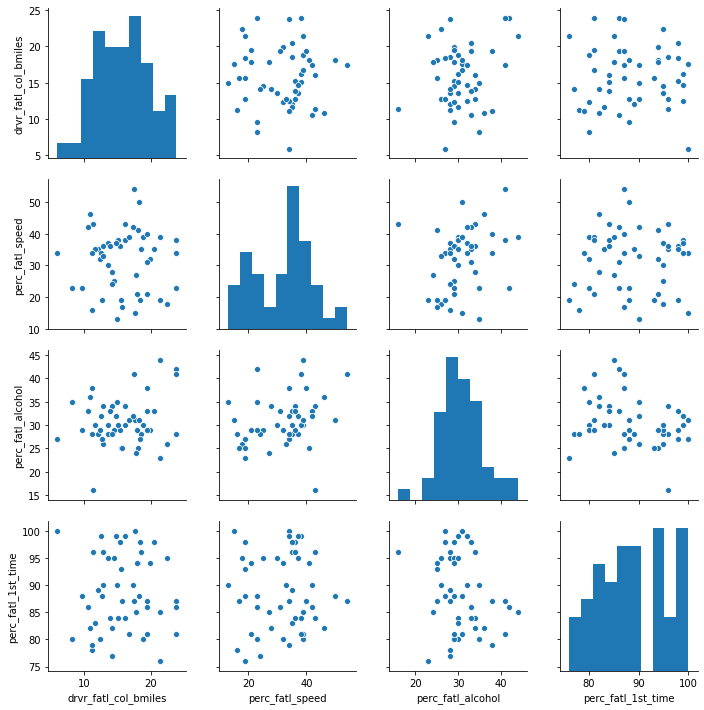

In [18]:
sns.pairplot(car_acc)

##### 3. Quantify the association of features and accidents
* From the graphical relationship among features, we can easily see some interesting relationship between features(the last 3 columns, and the target variable (the first column). The Pearson correlation coefficient is one of the most common methods to quantify correlationship between variables. There are threshold to define level of the relationship.
    * 0.2 = weak
    * 0.5 = medium
    * 0.8 = strong
    * 0.9 = very strong

In [5]:
car_acc.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


##### 4. Build and train Multilinear Regression Model
* From the correlation table about, we can see that there is a  relationship between the number of fatal accident and alcohol consumption, there also is a positive correlation between speed and alcohol consumption. However, there is a negative correlation among alcohol and first time accident. 
* The multilinear regression and the correlation table map out the relation between fatal accidents and the features in the data set. 

In [6]:
# import linear regression model, define target variable y, features X, and train the model
# Print out coefficients for these 3 features based on target variable.
from sklearn import linear_model
X = car_acc[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
y = car_acc[['drvr_fatl_col_bmiles']]
reg = linear_model.LinearRegression()
reg.fit(X, y)
reg.coef_

array([[-0.04180041,  0.19086404,  0.02473301]])

##### 5. Perform Dimentionality Reduction on Standardized data
* Because the features values have different scale, we need to convert them into a similar scale by instantiate StandardScaler (mean = 0, std=1)
* To cluster data into group, we use PCA to visualize and observed patterns by eye.

The cummulative variance of the first two principal components is 1.0


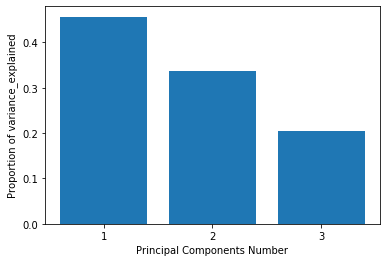

In [26]:
# import StandardScaler, fit and transform features after standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
# import PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
# import pyplot and plot the proportion of variance explained on the y axis
import  matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components Number')
plt.ylabel('Proportion of variance_explained')
plt.xticks([1,2,3])
two_first_comp_var_exp = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]  
print('The cummulative variance of the first two principal components is {}'.format(round(two_first_comp_var_exp),5))
      
      

##### 6. Visualize the first two components
* Use scatter plot of the first two components to explore how the states cluster together

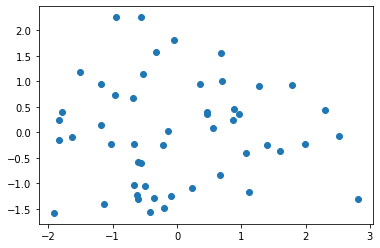

In [27]:
pca= PCA(n_components=2)
p_comps= pca.fit_transform(X_scaled)
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]
plt.scatter(x=p_comp1,y = p_comp2)

##### 7. Find clusters of similar states in the data
* Use KMeans and plot to find out the optimal number of clusters- the elbow effect- where the addition of more cluster doesn't give any more explotary power.

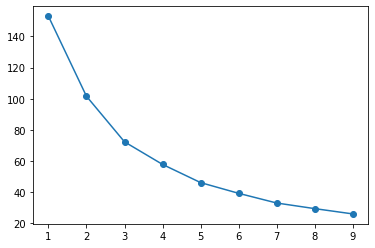

In [29]:
from sklearn.cluster import KMeans
ks = range(1,10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=8)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
plt.plot(ks, inertias, marker='o')

##### 8. Visualize Clusters in the PCA scatter plot
* Since there is no clear of how many clusters (states) should we choose on the graphic above, (it can be 2, 3 clusters), we draw scatter plot using 3 clusters.

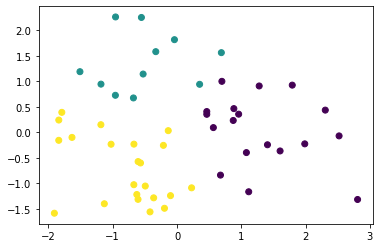

In [44]:
km = KMeans(n_clusters=3, random_state=8)
km.fit(X_scaled)
plt.scatter(x=p_comp1, y=p_comp2, c=km.labels_)

##### 9. Visualize the features differences between the clusters
* Our cluster include three features: drives speeding, under alcohol influence, and hasn't been in previous accidents

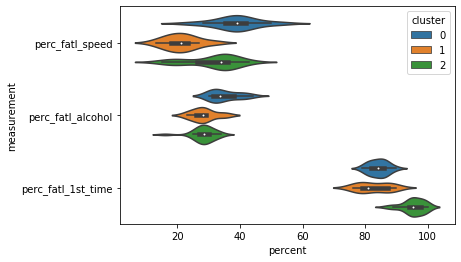

In [46]:
car_acc['cluster']= km.labels_
melt_car = pd.melt(car_acc, id_vars=['cluster'], var_name='measurement',
                            value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'],
                            value_name='percent')
sns.violinplot(x='percent', y='measurement', data=melt_car, hue='cluster')

##### 10. Compute the number of accidents within each cluster

num_drvr_fatl_col                        
                    count        mean         sum
cluster                                          
0                      18  911.406439  16405.3159
1                      11  860.505945   9465.5654
2                      22  898.378595  19764.3291

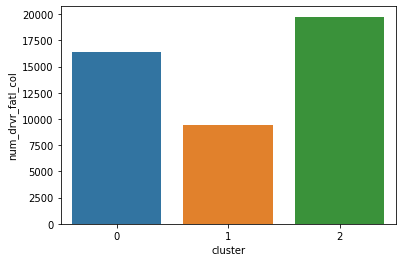

In [47]:
miles_driven = pd.read_csv('miles-driven.csv', sep='|')
car_acc_miles = car_acc.merge(miles_driven, on='state')
car_acc_miles['num_drvr_fatl_col']= car_acc_miles['drvr_fatl_col_bmiles']* car_acc_miles['million_miles_annually']/1000
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles,
           estimator=sum, ci=None)
count_mean_sum = car_acc_miles.groupby('cluster')['state', 'num_drvr_fatl_col'].agg(['count','mean','sum'])
count_mean_sum

##### 11. Conclusion
* There is no clear, or perfect choices regarding to which cluster is the most important to dive deeper. Which cluster should you choose based on the analysis above? 
* From the bar chart above, cluster 1 have the least accidents compared to the other clusters.